# <b> Stage 3: Visualization & Trend Analysis </b>

### Goal: Derive and visualize time-based and category-based trends.

### step 1. Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

### step 2. opening the csv file

In [ ]:
data_path = os.path.join('..', 'data', 'cleaned_dataset.csv')
df = pd.read_csv(data_path)
df.head()

,post_id,username,platform,post_type,post_date,likes,comments,shares,engagement_rate,sponsorship,brand_name,revenue_generated,ad_spent,category,region,follower_count,campaign_duration_days
0,P9928,@alex_99,Instagram,video,2024-10-31,15795.0,NaN,1044.0,NaN,No,Apple,557.351122,NaN,food,Usa,NaN,19.0
1,P1711,@travelwithsam,TikTok,image,2024-01-06,37194.0,NaN,NaN,12.16,No,Apple,42.899008,7.675834,fashion,Usa,NaN,NaN
2,P5554,@finance_guru,Instagram,text,2022-06-13,429365.0,769.0,NaN,NaN,No,NaN,4155.553088,8.149234,fitness,Usa,1767391.0,NaN
3,P6168,@finance_guru,Twitter,video,2023-10-27,891743.0,NaN,459.0,5.62,NaN,Cocacola,3367.370000,3.854824,fashion,Canada,10000.0,22.0
4,P6930,@travelwithsam,TikTok,text,2025-12-04,NaN,2904.0,1584.0,NaN,NaN,Google,4388.020000,11.254058,fashion,Usa,NaN,NaN


### Task 1. Monthly revenue trends across platforms

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\3809171317.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M').sum()['revenue_generated']


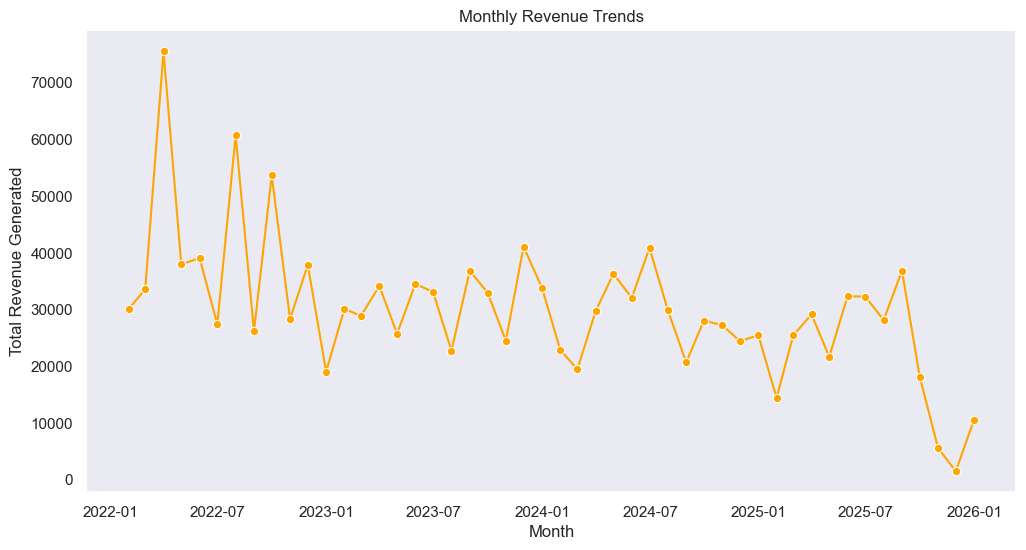

In [87]:
os.makedirs('results', exist_ok=True)
sns.set_theme(style="darkgrid", palette="magma")
df['post_date'] = pd.to_datetime(df['post_date'])
df.set_index('post_date', inplace=True)
monthly_revenue = df.resample('M').sum()['revenue_generated']
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='orange')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue Generated')
plt.grid()
plt.savefig(os.path.join('results', 'monthly_revenue_trends.png'))
plt.show()

---

### Task 2. Engagement vs Revenue scatter by region & Ad Spend Efficiency

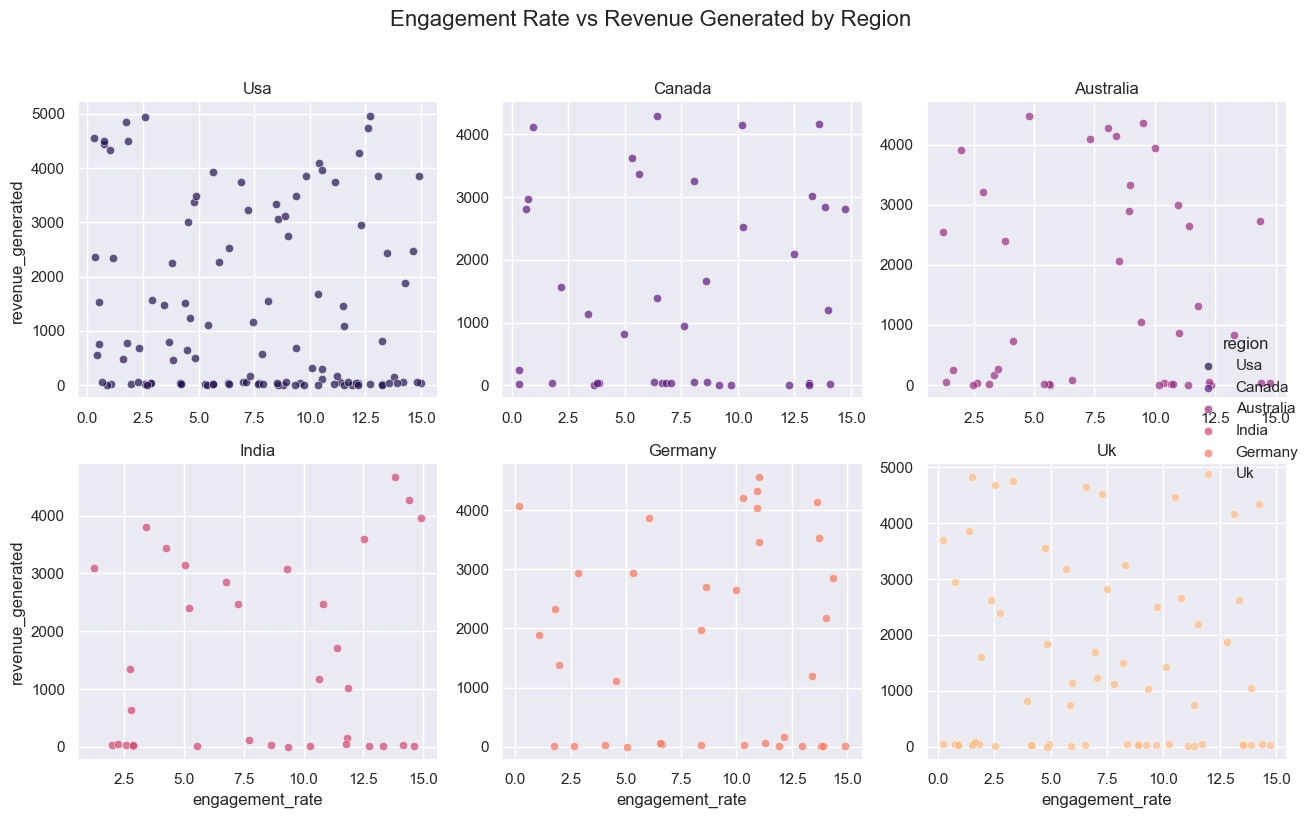

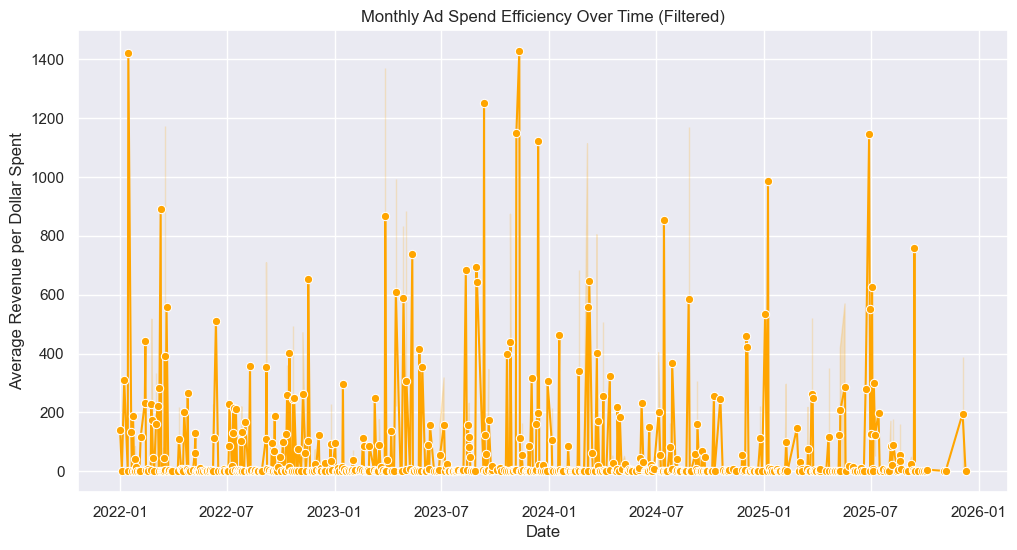

In [ ]:
sns.set_theme(style="darkgrid", palette="magma")
df_clean = df.dropna(subset=['engagement_rate', 'revenue_generated', 'region'])
g = sns.FacetGrid(df_clean, col='region', hue='region', col_wrap=3, height=4, sharex=False, sharey=False, palette='magma')
g.map(sns.scatterplot, 'engagement_rate', 'revenue_generated', alpha=0.7)
g.set_titles(col_template='{col_name}')
g.add_legend()
plt.suptitle('Engagement Rate vs Revenue Generated by Region', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join('results', 'engagement_vs_revenue_by_region_improved.png'))
plt.show()

# Ad Spend Efficiency (Revenue per Dollar Spent)
df['ad_spend_efficiency'] = df['revenue_generated'] / df['ad_spent']
df = df[df['ad_spent'] != 0].copy()
efficiency_threshold = df['ad_spend_efficiency'].quantile(0.99)
df_filtered = df[df['ad_spend_efficiency'] < efficiency_threshold].copy()
df_filtered.index = pd.to_datetime(df_filtered.index)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered.index, y=df_filtered['ad_spend_efficiency'], marker='o', color='orange')
plt.title('Monthly Ad Spend Efficiency Over Time (Filtered)')
plt.xlabel('Date')
plt.ylabel('Average Revenue per Dollar Spent')
plt.grid(True)
plt.savefig(os.path.join('results', 'ad_spend_efficiency_monthly_trend.png'))
plt.show()

### Task 3. ROI (Revenue / Ad Spent) by platform

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\2916831480.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=roi, y='platform', data=df_reset, palette='magma')


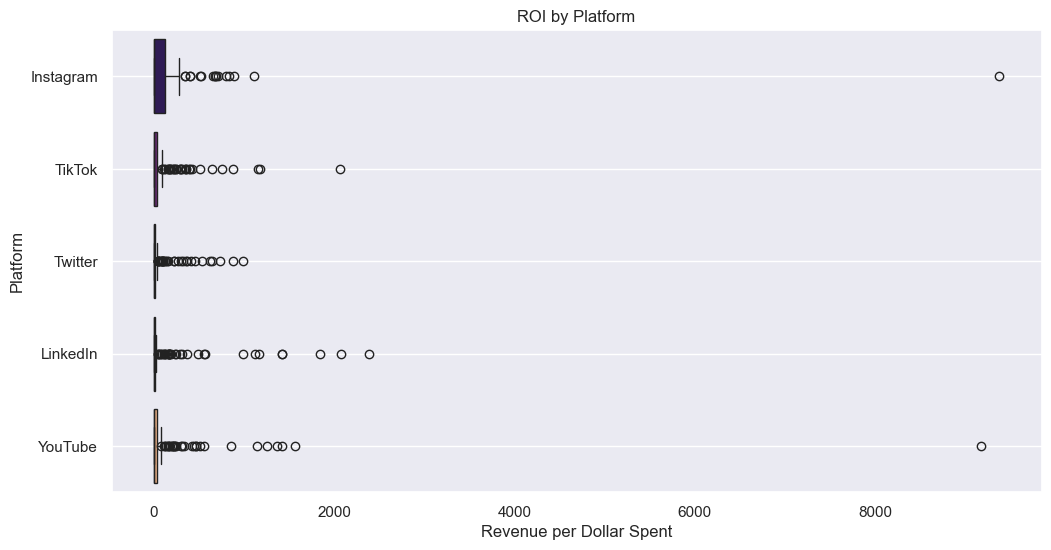

In [89]:
sns.set_theme(style="darkgrid", palette="magma")
if 'ad_spent' in df.columns:
    df_reset = df.reset_index()
    roi = df_reset['revenue_generated'] / df_reset['ad_spent']
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=roi, y='platform', data=df_reset, palette='magma')
    plt.title('ROI by Platform')
    plt.xlabel('Revenue per Dollar Spent')
    plt.ylabel('Platform')
    plt.grid()
    plt.savefig(os.path.join('results', 'roi_by_platform.png'))
    plt.show()
else:
    print("Column 'ad_spent' not found. Available columns:", df.columns.tolist())

### Task 4. Campaign duration vs engagement impact

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\3494789315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reset, x='campaign_duration_days', y='engagement_rate', palette='magma')


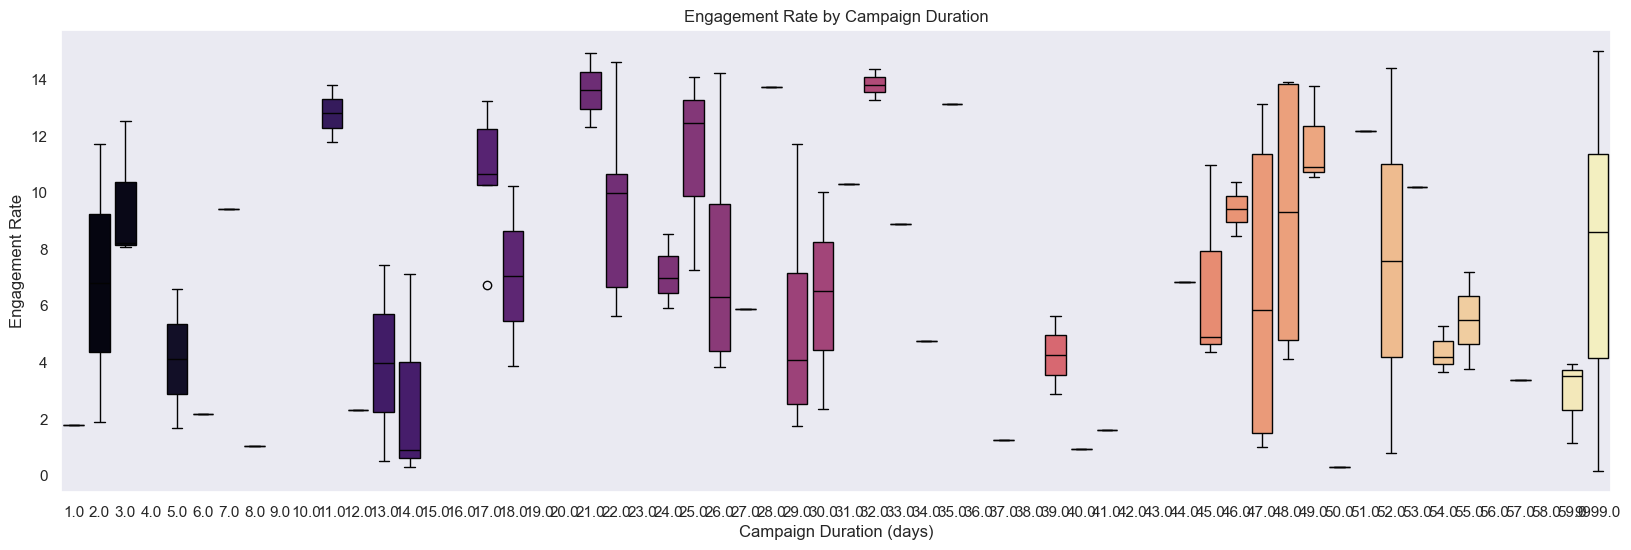

In [90]:
# Task 4. Campaign duration vs engagement impact
sns.set_theme(style="darkgrid", palette="magma")
df_reset = df.reset_index(drop=True)
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_reset, x='campaign_duration_days', y='engagement_rate', palette='magma')
plt.title('Engagement Rate by Campaign Duration')
plt.xlabel('Campaign Duration (days)')
plt.ylabel('Engagement Rate')
plt.grid(axis='y')
plt.savefig(os.path.join('results', 'engagement_by_campaign_duration.png'))
plt.show()

### Task 5. Top-performing brands by revenue

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\418102679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')


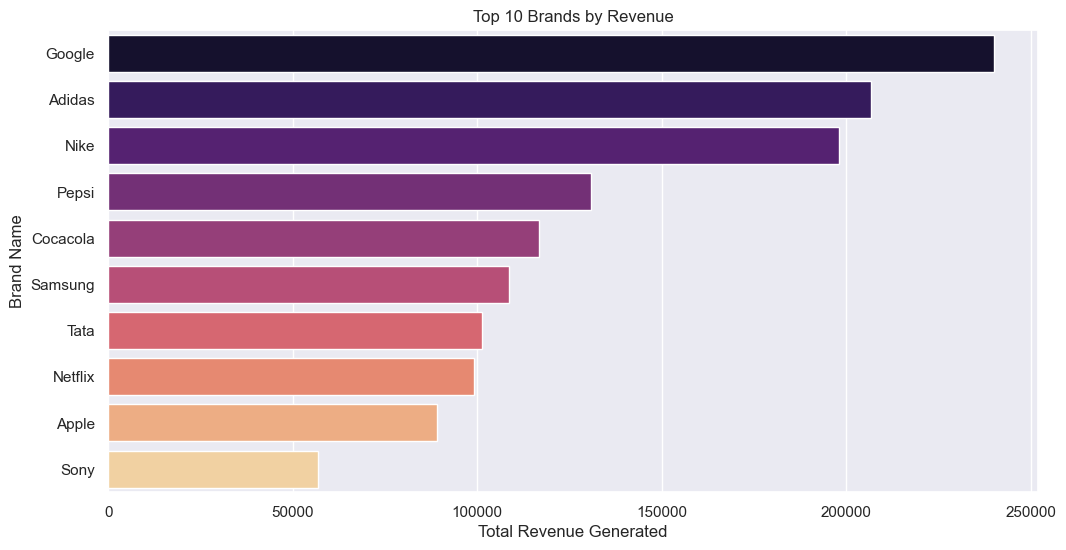

In [91]:
sns.set_theme(style="darkgrid", palette="magma")
top_brands = df.groupby('brand_name')['revenue_generated'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Brand Name')
plt.savefig(os.path.join('results', 'top_10_brands_by_revenue.png'))
plt.show()

### Task 6. Top-performing platforms by revenue

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\3741501262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='magma')


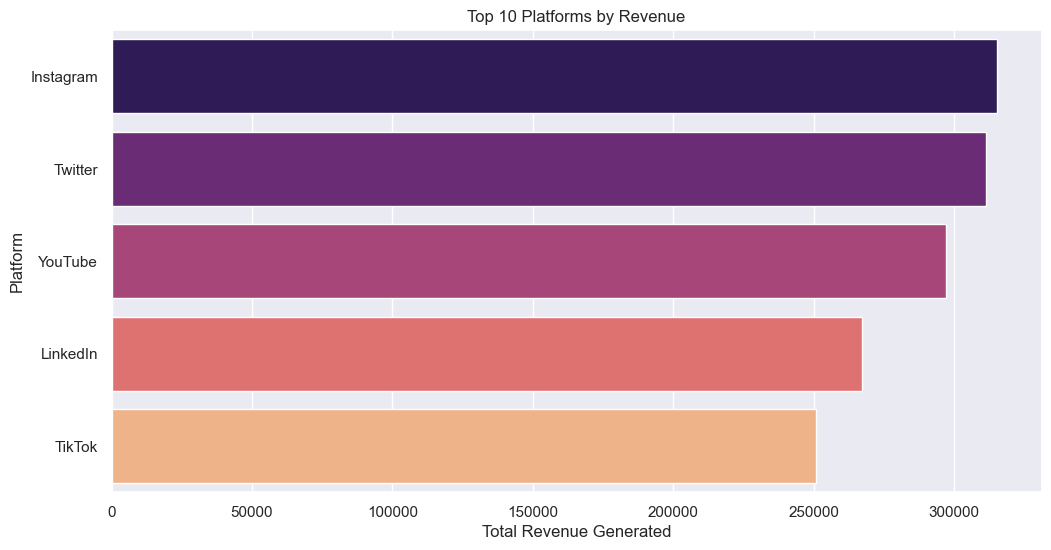

In [92]:
# Task 6. Top-performing platforms by revenue
sns.set_theme(style="darkgrid", palette="magma")
top_platforms = df.groupby('platform')['revenue_generated'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='magma')
plt.title('Top 10 Platforms by Revenue')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Platform')
plt.savefig(os.path.join('results', 'top_10_platforms_by_revenue.png'))
plt.show()

### Task 7. Top-performing categories by revenue

C:\Users\asus\AppData\Local\Temp\ipykernel_22252\647204907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


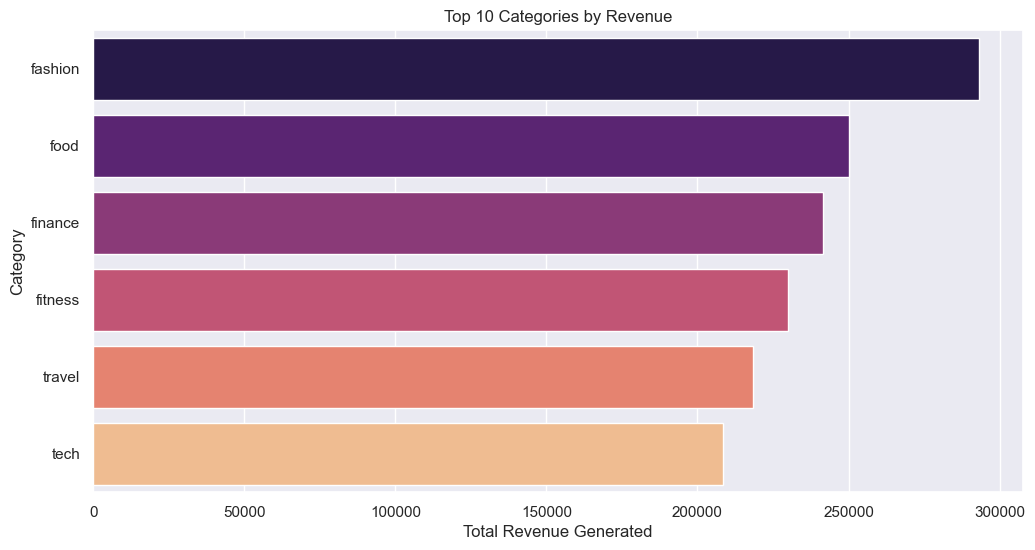

In [93]:
sns.set_theme(style="darkgrid", palette="magma")
top_categories = df.groupby('category')['revenue_generated'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Category')
plt.savefig(os.path.join('results', 'top_10_categories_by_revenue.png'))
plt.show()

### Task 8. Display the final dataframe

In [94]:
df

,post_id,username,platform,post_type,likes,comments,shares,engagement_rate,sponsorship,brand_name,revenue_generated,ad_spent,category,region,follower_count,campaign_duration_days,ad_spend_efficiency
post_date,,,,,,,,,,,,,,,,,
2024-10-31,P9928,@alex_99,Instagram,video,15795.0,NaN,1044.0,NaN,No,Apple,557.351122,NaN,food,Usa,NaN,19.0,NaN
2024-01-06,P1711,@travelwithsam,TikTok,image,37194.0,NaN,NaN,12.16,No,Apple,42.899008,7.675834,fashion,Usa,NaN,NaN,5.588840
2022-06-13,P5554,@finance_guru,Instagram,text,429365.0,769.0,NaN,NaN,No,NaN,4155.553088,8.149234,fitness,Usa,1767391.0,NaN,509.931770
2023-10-27,P6168,@finance_guru,Twitter,video,891743.0,NaN,459.0,5.62,NaN,Cocacola,3367.370000,3.854824,fashion,Canada,10000.0,22.0,873.546978
2025-12-04,P6930,@travelwithsam,TikTok,text,NaN,2904.0,1584.0,NaN,NaN,Google,4388.020000,11.254058,fashion,Usa,NaN,NaN,389.905589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-12,P7185,@techietom,LinkedIn,reel,39887.0,2845.0,NaN,NaN,Yes,Nike,4392.180000,18.949955,finance,Uk,1601241.0,NaN,231.777860
2024-04-28,P8411,@techietom,Twitter,text,924516.0,NaN,422.0,NaN,NaN,Samsung,11.134581,14.066727,food,India,1200000.0,34.0,0.791554
2022-02-26,P3583,@finance_guru,Instagram,video,NaN,NaN,452.0,NaN,NaN,Google,2857.830000,1771.640000,finance,Usa,NaN,9999.0,1.613099
